In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
dataset=pd.read_csv("C:/Users/56961/Desktop/Proyecto ML CEN/dataset.csv/dataset.csv",sep=";")

In [3]:
dataset.drop(["node"],inplace=True,axis=1)

In [4]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [6]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [7]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")

In [8]:
test=dataset.query("date.dt.year==2022")

In [9]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [10]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [11]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head(-5)

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069
...,...,...
2021-12-31 14:00:00,LOSALME,173.281029
2021-12-31 15:00:00,LOSALME,170.696485
2021-12-31 16:00:00,LOSALME,170.537953


In [12]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head(-5)

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176
...,...,...
2022-12-31 14:00:00,LOSALME,126.068562
2022-12-31 15:00:00,LOSALME,123.914380
2022-12-31 16:00:00,LOSALME,120.936187


In [13]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

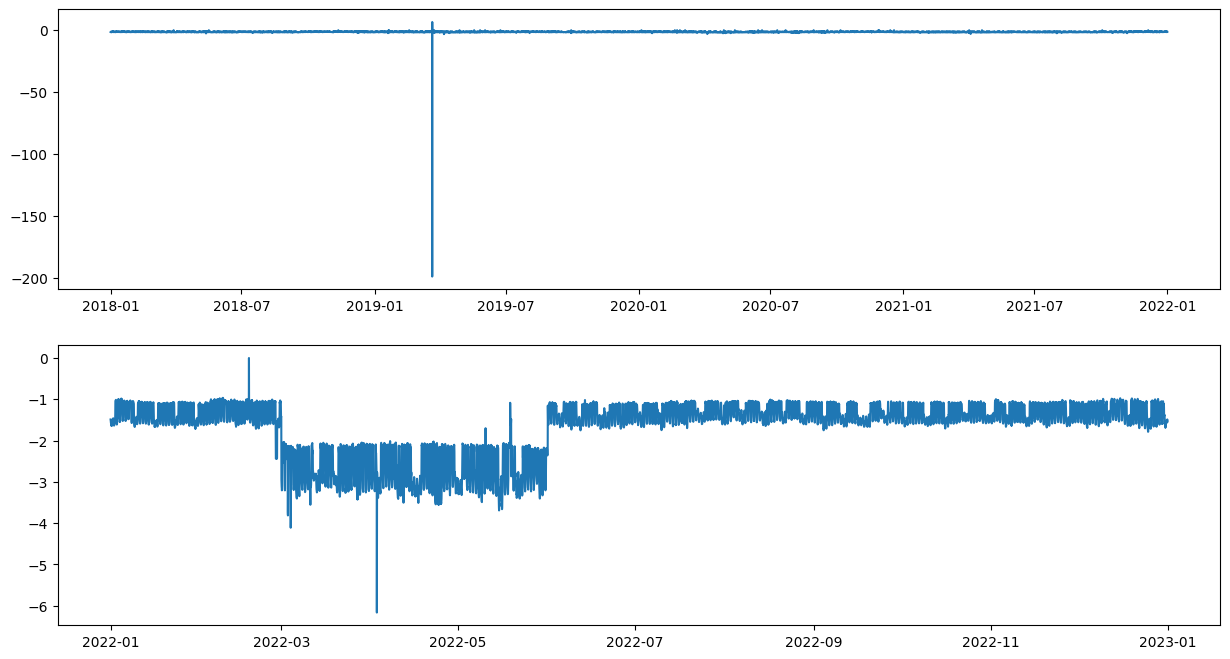

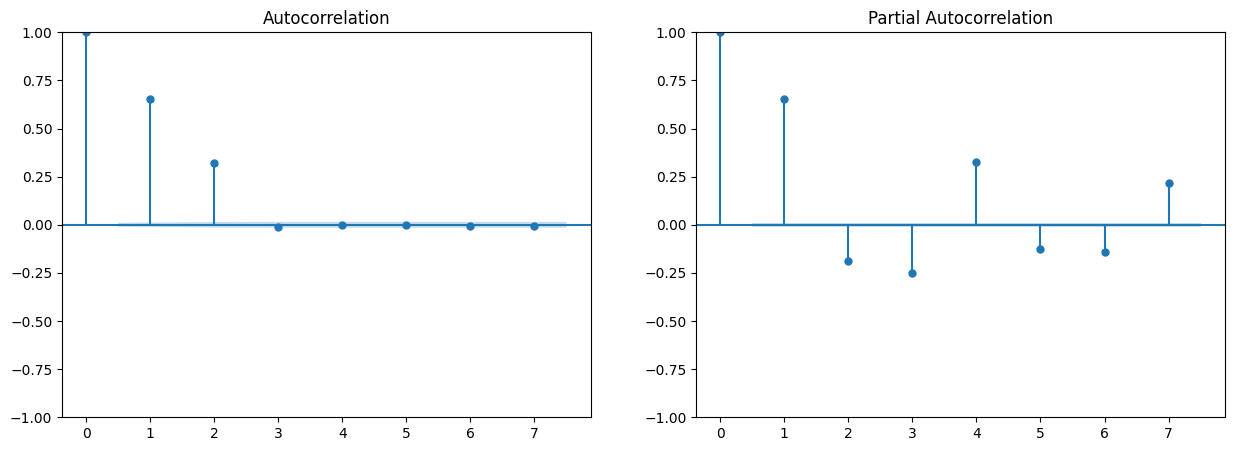

In [14]:
#Analisis estadistico de BUIN
subestacion="BUIN"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

<Axes: xlabel='hour', ylabel='consumption'>

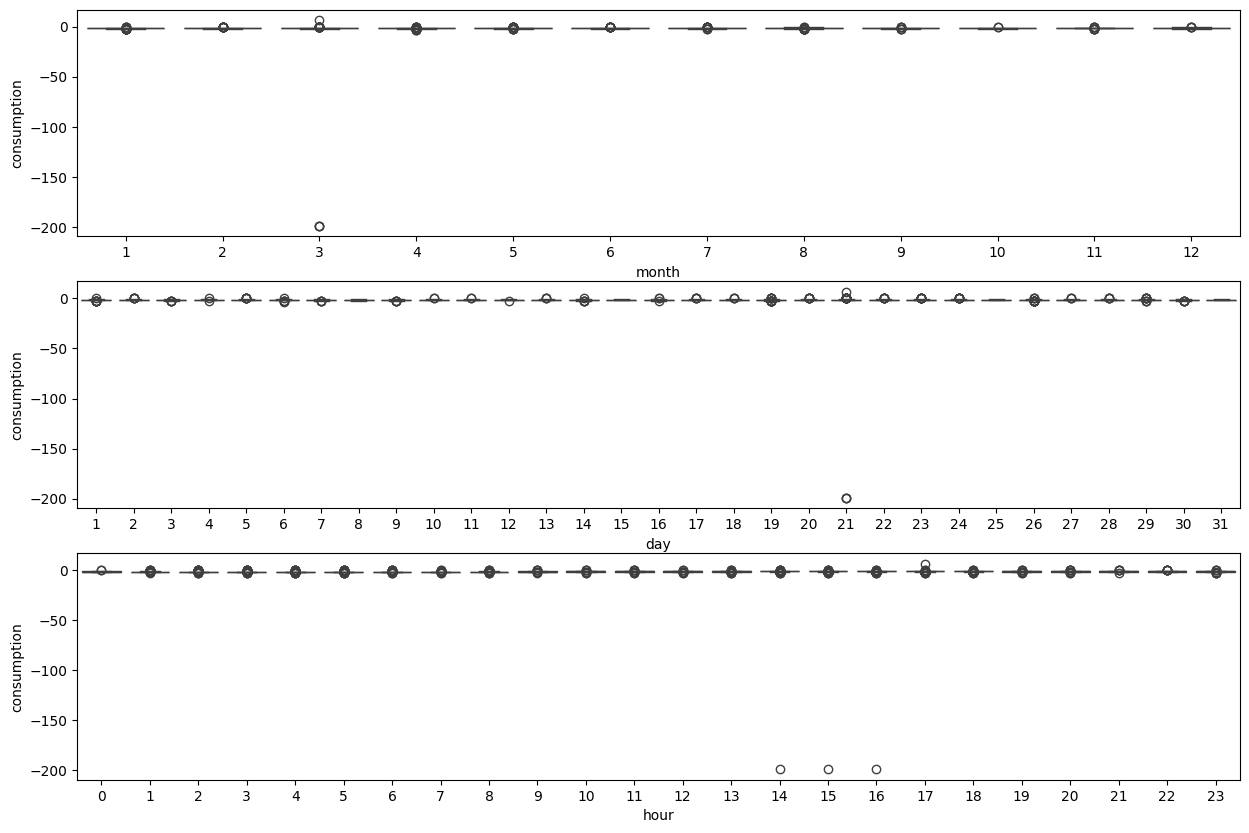

In [15]:
import seaborn as sns

data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [16]:
data["year"]=data["date"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


In [17]:
data.head()

,consumption,date,day,hour,month,year
date,,,,,,
2018-01-01 00:00:00,-1.469724,2018-01-01 00:00:00,1,0,1,2018
2018-01-01 01:00:00,-1.485837,2018-01-01 01:00:00,1,1,1,2018
2018-01-01 02:00:00,-1.509146,2018-01-01 02:00:00,1,2,1,2018
2018-01-01 03:00:00,-1.536619,2018-01-01 03:00:00,1,3,1,2018
2018-01-01 04:00:00,-1.564093,2018-01-01 04:00:00,1,4,1,2018


In [18]:
data_buin=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_buin.to_csv("data_buin.csv")

In [19]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_buin.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

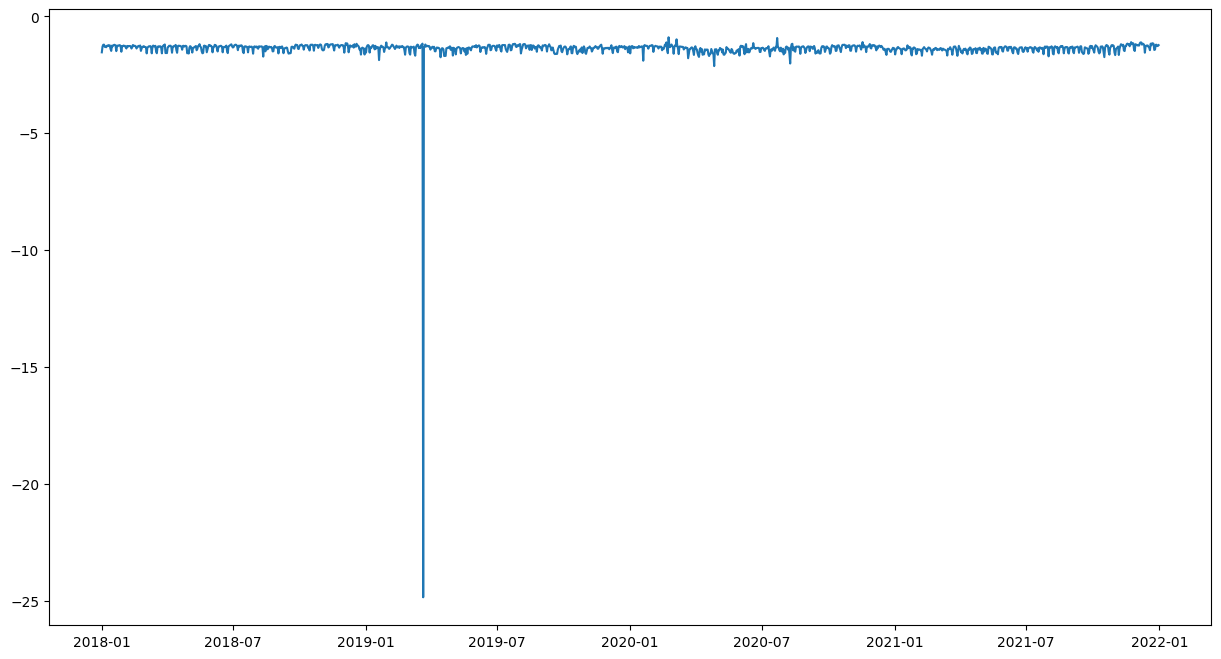

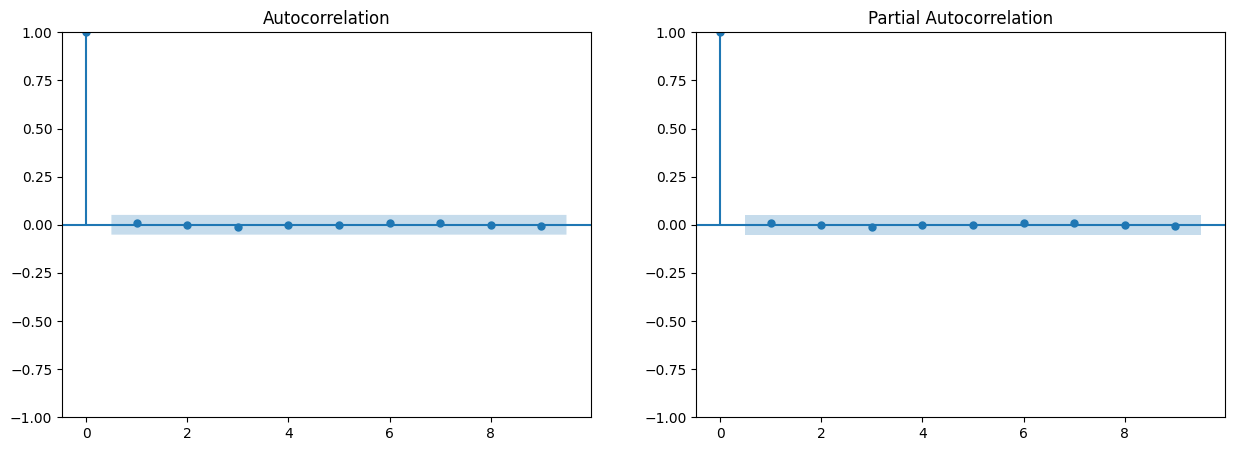

In [20]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -37.919792
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Estadistico ADF: -37,919792 indica la estadistica de la prueba calculada. Un valor mas negativo sugiere una mayor evidencia contra la hipotesis nula de que hay una raiz unitaria presente en la serie de tiempo, lo que significa que es mas probable que la serie sea estacionaria
p value < 0,05, la serie es estacionaria.
el estadistico ADF es mucho mas negativo que cualquiera de los valores criticos, lo que significa que se puede rechazar la hipotesis nula con un alto nivel de confianza.
### Es decir, la serie de tiempo es estacionaria

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import numpy as np

In [23]:
# Encontrar el mejor modelo ARIMA
modelo_auto = auto_arima(ys, seasonal=False, trace=True)
# Obtener los términos óptimos del modelo ARIMA
best_order = modelo_auto.get_params()['order']
# Ajustar el modelo ARIMA con los términos óptimos
modelo_losalme_d = ARIMA(ys, order=best_order)
m_ad1 = modelo_losalme_d.fit()
# Calcular el error cuadrático medio
mse = m_ad1.mse
# Calcular el criterio de información de Akaike (AIC)
aic = m_ad1.aic
# Realizar predicciones
ysp = m_ad1.predict()
# Calcular el error porcentual absoluto medio (MAPE)
mape = mean_absolute_percentage_error(ys, ysp)

# Imprimir las métricas de evaluación
print("MSE:", mse)
print("AIC:", aic)
print("MAPE:", mape)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5361.243, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3658.502, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4589.097, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3332.546, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3193.228, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3109.093, Time=0.06 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3055.439, Time=0.09 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2793.577, Time=0.16 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2791.581, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2789.586, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2787.743, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2785.7

In [24]:
modelo_buin=ARIMA(ys,order=(0,0,0))#Parametros escogidos a partir de auto arima
m_ad1=modelo_buin.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 0.39250938935787594
AIC 2783.81876183619
MAPE 0.07375177343431699


In [25]:
modelo_buin=ARIMA(ys,order=(3,0,3))#Parametros escogidos a partir de lo visto en clases.
m_ad1=modelo_buin.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 0.39238665834530134
AIC 2795.3634947665782
MAPE 0.07341833894991627


Modelo Arima

El error cuadrado medio no es muy alto, pero tampoco es muy auspicioso. 
El AIC sirve para comparar el rendimiento con el AIC de otros modelos.
El MAPE sugiere que el modelo tiene un buen rendimiento,  las predicciones estan bastante cerca de los valores reales en promedio.

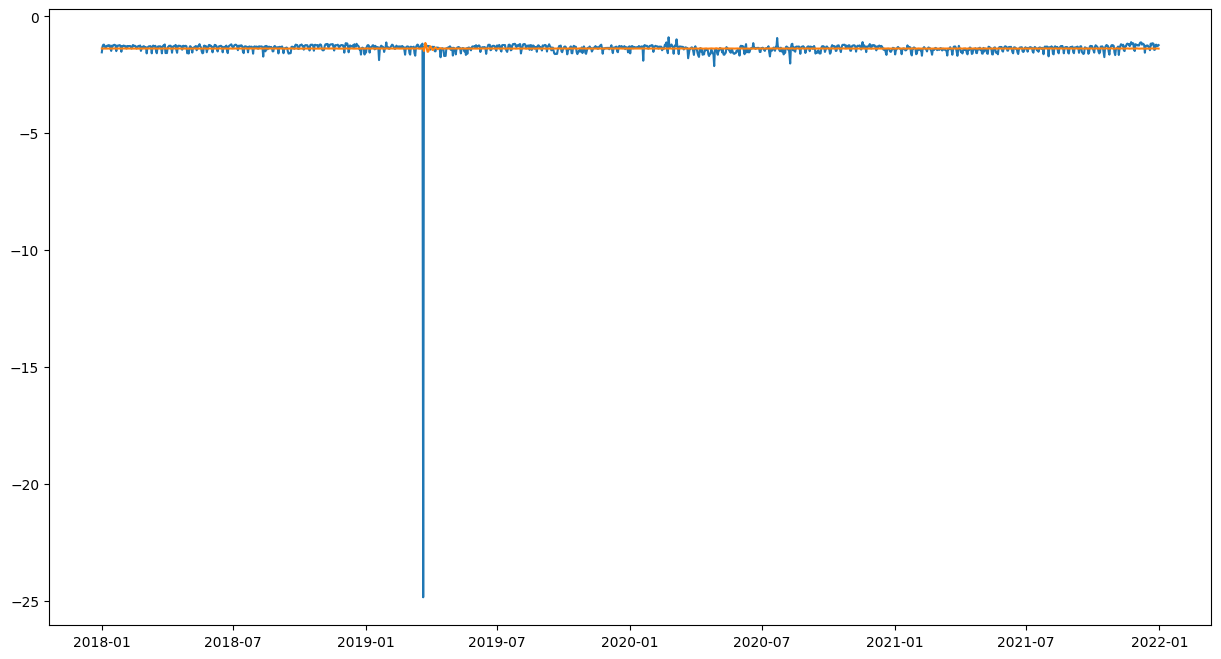

In [26]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [27]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [28]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [29]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [30]:
seed=16011996
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [31]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
tag="rnn_buin"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs\\fit\\' + tag 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'\\model_buin_{0}.keras'.format(tag))
#batch de 32 implica un peor rendimiento notablemente. Lo mismo pero en menor medida para batch de 512.

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3658 - mae: 1.1781 - mape: 86.4753 - mse: 2.3658
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6294 - mae: 0.5734 - mape: 41.3468 - mse: 0.6294
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3661 - mae: 0.2864 - mape: 20.2544 - mse: 0.3661
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3215 - mae: 0.2393 - mape: 16.6417 - mse: 0.3215
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3252 - mae: 0.2459 - mape: 17.7487 - mse: 0.3252
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2986 - mae: 0.1883 - mape: 12.6706 - mse: 0.2986
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2719 - mae: 0.1313 - mape: 9.0499 - mse: 0.2719
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2704 - mae: 0.1183 - mape: 7.9650 - mse: 0.2704
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2679 - mae: 0.1069 - mape: 6.8420 - mse: 0.2679
Epoch 10/200
6/6 ━━━━━

#### Mejor resultado obtenido sin shuffle:
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])

Epoch 193/200
6/6 [==============================] - 0s 21ms/step - loss: 0.3925 - mse: 0.3925 - mae: 0.0916 - mape: 5.3931

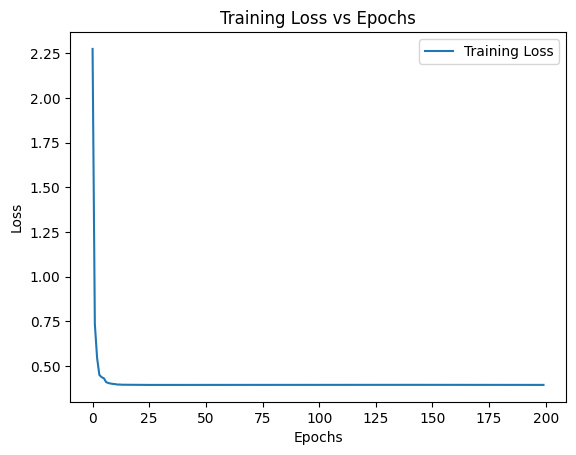

In [33]:
plt.plot(rnn.history['loss'], label='Training Loss')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


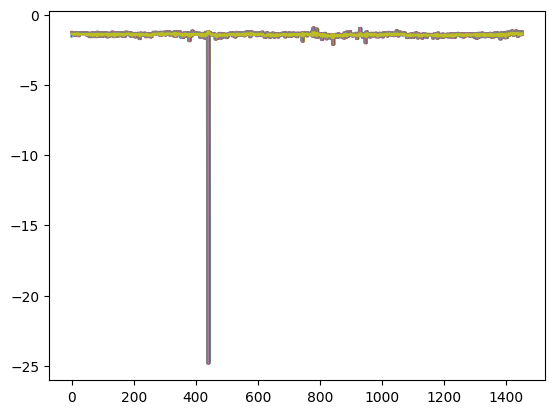

In [34]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

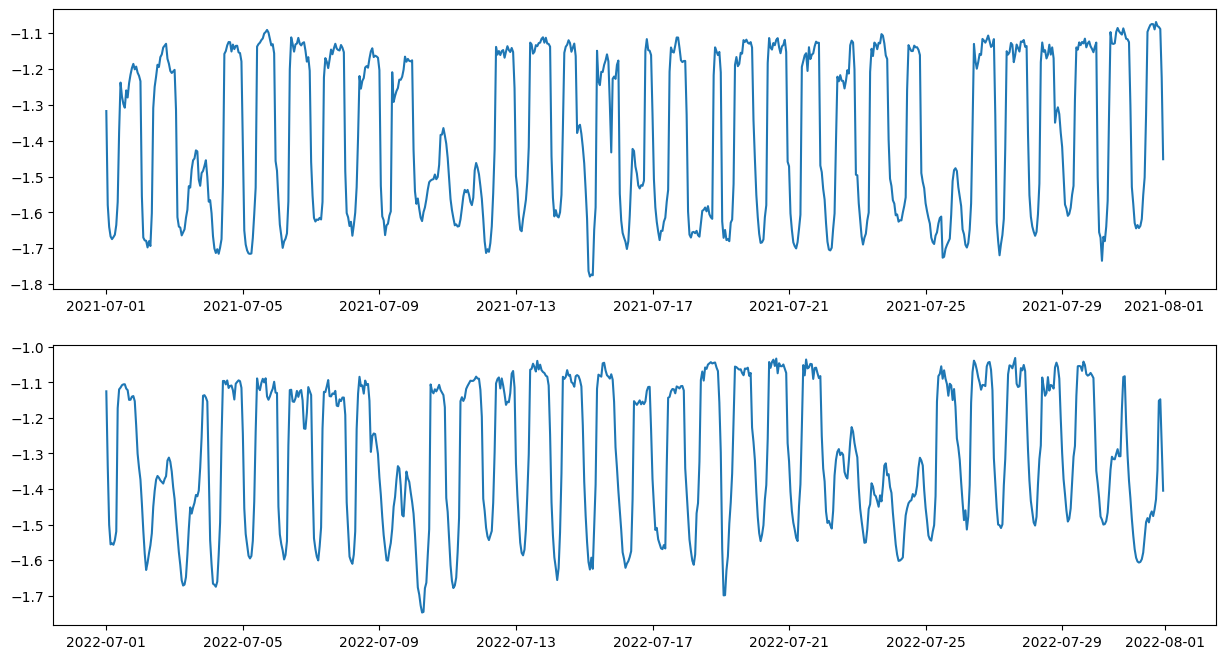

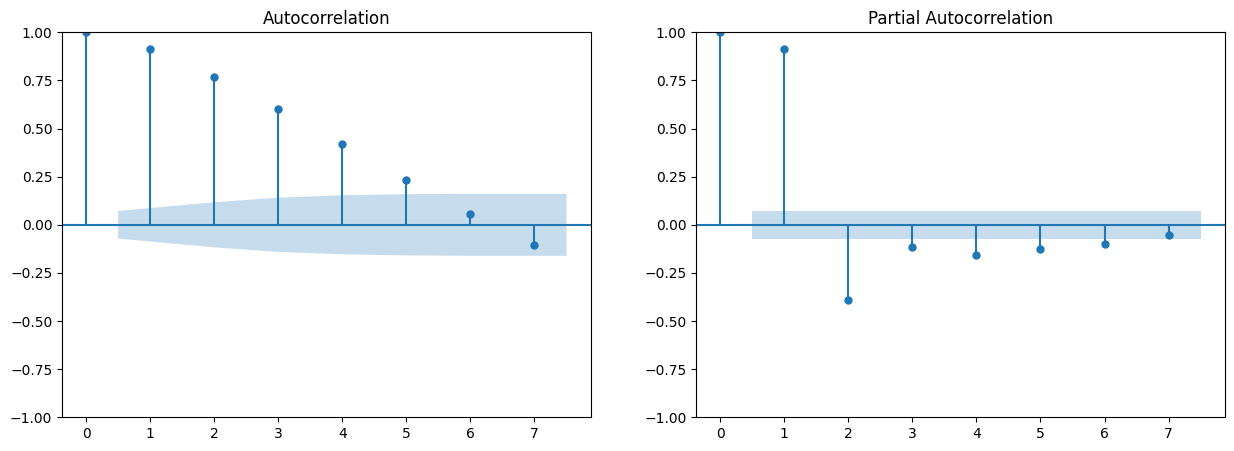

In [35]:
subestacion="BUIN"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==7".format(subestacion)
ym=ds_train.query(filtro)["consumption"]
xm=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==7".format(subestacion)
ytm=ds_test.query(filtro)["consumption"]
xtm=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(xm,ym);
axes[1].plot(xtm,ytm);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ym,lags=7,ax=axes[0]);
plot_pacf(ym,lags=7,method="ywm",ax=axes[1]);

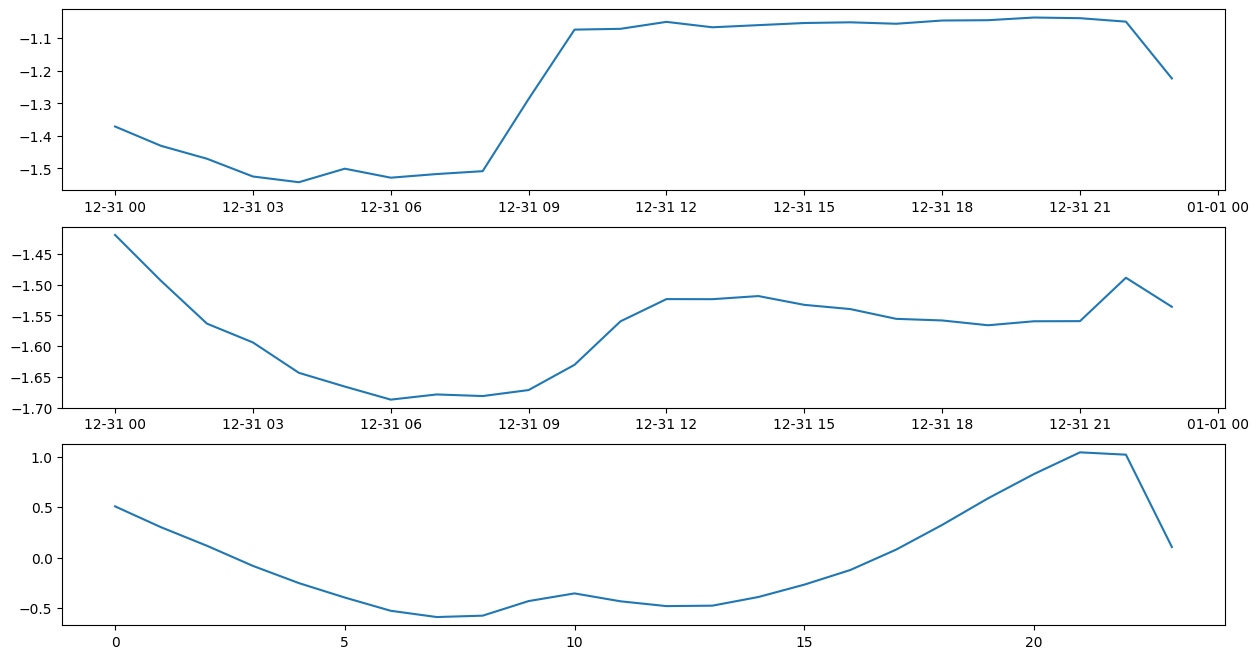

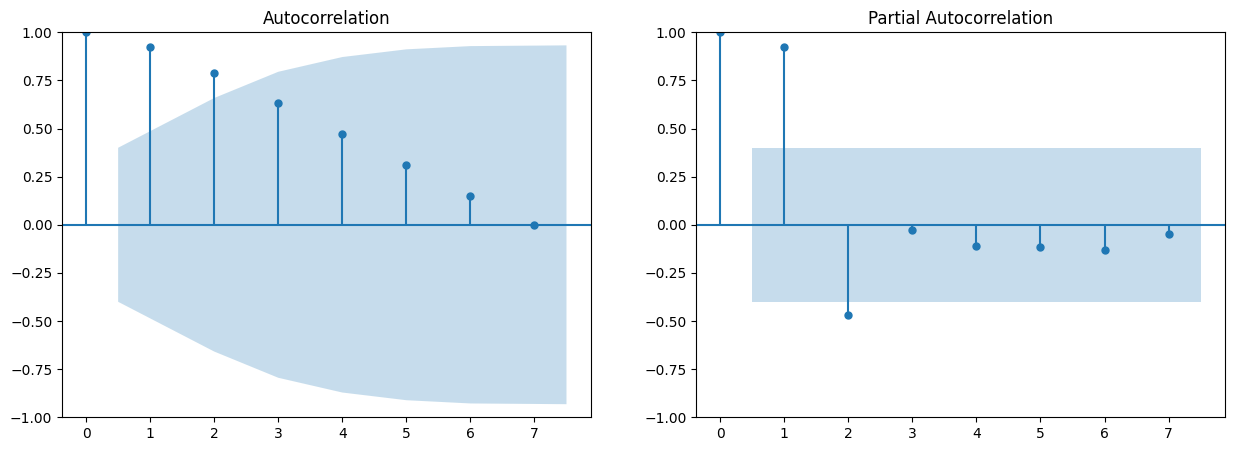

In [36]:
subestacion="BUIN"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==12 and date.dt.day==31".format(subestacion)
yd=ds_train.query(filtro)["consumption"]
xd=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==12 and date.dt.day==31".format(subestacion)
ytd=ds_test.query(filtro)["consumption"]
xtd=ds_test.query(filtro).index
c_yd_ytd=sm.tsa.stattools.ccf(yd, ytd);
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 8)
axes[0].plot(xd,yd);
axes[1].plot(xtd,ytd);
axes[2].plot(c_yd_ytd);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(yd,lags=7,ax=axes[0]);
plot_pacf(yd,lags=7,method="ywm",ax=axes[1]);

In [37]:
model_shuffle = Sequential()
model_shuffle.add(Input(name="serie",shape=(8,1)))
model_shuffle.add(SimpleRNN(256))
model_shuffle.add(Dense(128))
model_shuffle.add(Dense(1, activation='linear'))
model_shuffle.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
tag="rnn_buin_shuffle"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs\\fit\\" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_shuffle.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_shuffle.fit(yw, yt, batch_size=256, epochs=200, shuffle=True ,verbose=1,callbacks=[tensorboard_callback])
model_shuffle.save(log_dir+'\\model_buin_shuffle_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9141 - mae: 1.1857 - mape: 86.6587 - mse: 1.9141  
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4913 - mae: 0.4482 - mape: 31.9743 - mse: 0.4913
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3535 - mae: 0.2850 - mape: 20.3788 - mse: 0.3535
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3169 - mae: 0.2318 - mape: 15.9855 - mse: 0.3169
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3039 - mae: 0.2109 - mape: 15.1670 - mse: 0.3039
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2827 - mae: 0.1491 - mape: 9.8066 - mse: 0.2827
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2695 - mae: 0.1304 - mape: 9.0265 - mse: 0.2695
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2661 - mae: 0.1011 - mape: 6.5344 - mse: 0.2661
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2629 - mae: 0.0974 - mape: 6.2856 - mse: 0.2629
Epoch 10/200
6/6 ━━━━

#### Mejor resultado con shuffle:
rnn = model_shuffle.fit(yw, yt, batch_size=512, epochs=200, shuffle=True ,verbose=1,callbacks=[tensorboard_callback])

Epoch 193/200
3/3 [==============================] - 0s 43ms/step - loss: 0.3925 - mse: 0.3925 - mae: 0.0900 - mape: 5.2571

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


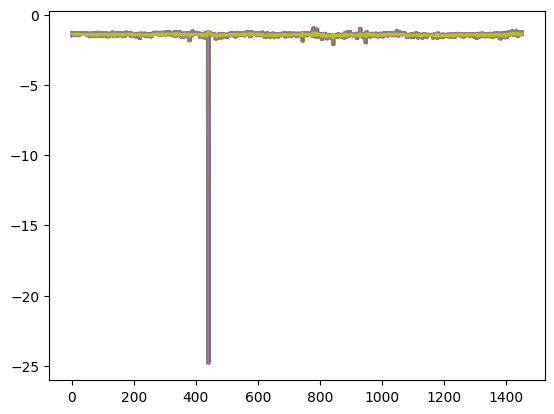

In [39]:
xw=[i for i in range(len(yw))]
yp=model_shuffle.predict(yw)
plt.plot(xw,yw,xw,yp)

In [40]:
#Attention
from keras.layers import Input, Attention, MultiHeadAttention, Flatten
from keras.models import Model

In [46]:
d=128
input=Input(name="activity",shape=(8,1))
attention = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_buin=Model(inputs=input,outputs=output)
model_att_buin.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1024)      │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      1,025 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
tag="mhatt_buin"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_buin.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_buin.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model_att_buin.save(log_dir+'/model_att_buin{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.9703 - mae: 1.3051 - mape: 94.8477 - mse: 1.9703
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.9335 - mae: 0.7966 - mape: 57.3475 - mse: 0.9335
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4478 - mae: 0.2300 - mape: 16.5618 - mse: 0.4478
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4030 - mae: 0.3141 - mape: 23.0597 - mse: 0.4030
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2857 - mae: 0.1390 - mape: 9.0336 - mse: 0.2857
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2958 - mae: 0.1849 - mape: 12.3024 - mse: 0.2958
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2669 - mae: 0.1150 - mape: 7.6968 - mse: 0.2669
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2765 - mae: 0.1546 - mape: 10.9736 - mse: 0.2765
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2656 - mae: 0.1027 - mape: 6.6682 - mse: 0.2656
Epoch 10/200
6/6 ━━━━━

#### Mejor resultado MHA sin Shuffle:
rnn = model_att_buin.fit(yw, yt, batch_size=512, epochs=20,verbose=1,callbacks=[tensorboard_callback])

Epoch 19/20

3/3 [==============================] - 0s 65ms/step - loss: 0.3983 - mse: 0.3983 - mae: 0.0997 - mape: 5.8328

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


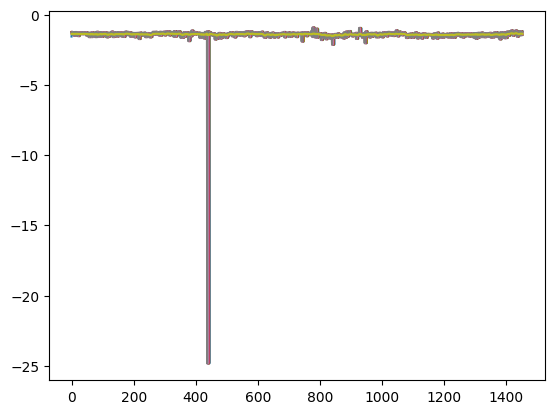

In [48]:
xw=[i for i in range(len(yw))]
yp=model_att_buin.predict(yw)
plt.plot(xw,yw,xw,yp)

In [50]:
d=128
input=Input(name="activity",shape=(8,1))
attention= MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_buin_shuffle=Model(inputs=input,outputs=output)
model_att_buin_shuffle.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │      1,025 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
tag="mhatt_buin_shuffle"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_buin_shuffle.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_buin_shuffle.fit(yw, yt, batch_size=256, shuffle=True, epochs=200, verbose=1,callbacks=[tensorboard_callback])
model_att_buin_shuffle.save(log_dir+'/model_att_buin_shuffle{0}.keras'.format(tag))


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.3077 - mae: 1.4280 - mape: 103.9176 - mse: 2.3077
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.7684 - mae: 1.2267 - mape: 89.0630 - mse: 1.7684
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1238 - mae: 0.9186 - mape: 66.3070 - mse: 1.1238
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3873 - mae: 0.2948 - mape: 20.6306 - mse: 0.3873
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4735 - mae: 0.4369 - mape: 32.2457 - mse: 0.4735
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2866 - mae: 0.1613 - mape: 11.3499 - mse: 0.2866
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3018 - mae: 0.2023 - mape: 13.5404 - mse: 0.3018
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2791 - mae: 0.1422 - mape: 9.1956 - mse: 0.2791 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2676 - mae: 0.1364 - mape: 9.4988 - mse: 0.2676
Epoch 10/200
6/6 ━━

### Mejor resultado con shuffle (MHattention):¶
rnn = model_att_buin_shuffle.fit(yw, yt, batch_size=512, shuffle=True, epochs=20, verbose=1,callbacks=[tensorboard_callback])

Epoch 4/20
3/3 [==============================] - 0s 59ms/step - loss: 0.3989 - mse: 0.3989 - mae: 0.1004 - mape: 5.8608

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


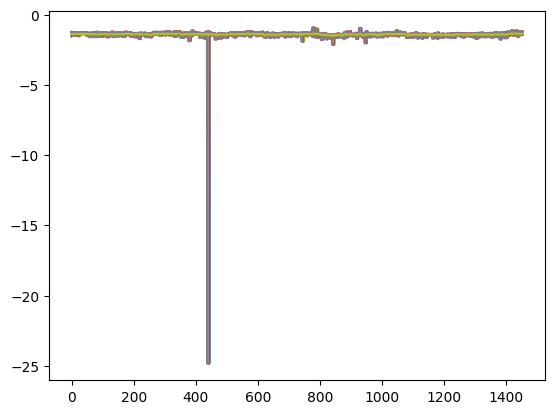

In [52]:
xw=[i for i in range(len(yw))]
yp=model_att_buin_shuffle.predict(yw)
plt.plot(xw,yw,xw,yp)

In [53]:
yw.shape

(1453, 8)

In [54]:
attention_output,attention_scores=model_att_buin_shuffle.layers[1](yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                return_attention_scores=True)

In [55]:
attention_scores.shape

TensorShape([1, 1, 8, 8])

In [56]:
attention_output.shape

TensorShape([1, 8, 1])

In [57]:
import seaborn as sb

In [58]:
timesteps = ["t"+str(i) for i in range(8)]
timesteps.reverse()

In [59]:
timesteps

['t7', 't6', 't5', 't4', 't3', 't2', 't1', 't0']

<Axes: >

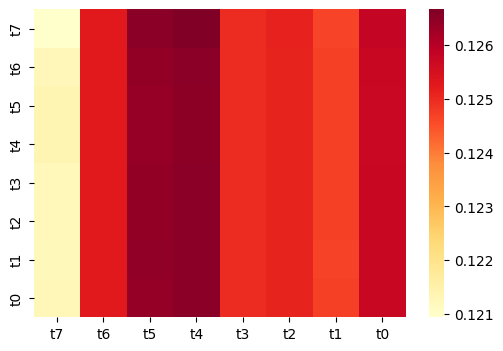

In [60]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [61]:
W=model_att_buin_shuffle.layers[1].get_weights()

In [62]:
len(W)

8

In [63]:
componentes=["query","query_bias","key","key_bias","value","value_bias",
             "projection","projection"]
for name, out in zip(componentes,W):
    print(name, out.shape)

query (1, 1, 128)
query_bias (1, 128)
key (1, 1, 128)
key_bias (1, 128)
value (1, 1, 128)
value_bias (1, 128)
projection (1, 128, 1)
projection (1,)


In [68]:
#No multihead attention, solo Attention
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention= Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_buin_2=Model(inputs=input,outputs=output)
model_att_buin_2.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wq (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wv (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wk (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_3         │ (None, 8, 128)    │          0 │ wq[0][0],         │
│ (Attention)         │                   │            │ wv[0][0],         │
│                     │                   │            │ wk[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 8, 128)    │     16,512 │ attention_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1024)      │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │      1,025 │ flatten_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,305 (71.50 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_buin_2.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_buin_2.fit(yw, yt, batch_size=256, shuffle=False, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model_att_buin_2.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.6676 - mae: 0.9606 - mape: 70.0177 - mse: 1.6676
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8368 - mae: 0.5990 - mape: 43.7427 - mse: 0.8368
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5502 - mae: 0.1825 - mape: 11.6442 - mse: 0.5502
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6098 - mae: 0.2953 - mape: 19.9817 - mse: 0.6098
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5280 - mae: 0.1469 - mape: 9.4463 - mse: 0.5280
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5370 - mae: 0.1917 - mape: 13.1183 - mse: 0.5370
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5240 - mae: 0.1057 - mape: 5.9510 - mse: 0.5240
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5254 - mae: 0.1083 - mape: 6.1588 - mse: 0.5254
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5201 - mae: 0.1280 - mape: 8.0188 - mse: 0.5201
Epoch 10/200
6/6 ━━━━━━

El mejor valor fue obtenido sin shuffle, pero por lo general con shuffle los resultados eran mejores en cada batch size.

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


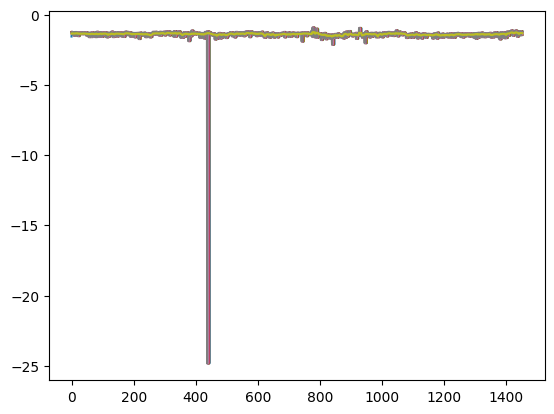

In [70]:
xw=[i for i in range(len(yw))]
yp=model_att_buin_2.predict(yw)
plt.plot(xw,yw,xw,yp)

In [71]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention= Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_buin_2_shuffle=Model(inputs=input,outputs=output)
model_att_buin_2_shuffle.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wq (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wv (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wk (Dense)          │ (None, 8, 128)    │        256 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_4         │ (None, 8, 128)    │          0 │ wq[0][0],         │
│ (Attention)         │                   │            │ wv[0][0],         │
│                     │                   │            │ wk[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 8, 128)    │     16,512 │ attention_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 1024)      │          0 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │      1,025 │ flatten_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,305 (71.50 KB)

 Trainable params: 18,305 (71.50 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_buin_2_shuffle.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_buin_2_shuffle.fit(yw, yt, batch_size=256, shuffle=True, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model_att_buin_2_shuffle.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.5151 - mae: 0.8035 - mape: 58.3180 - mse: 2.5151
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3629 - mae: 1.0464 - mape: 75.8000 - mse: 1.3629
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0073 - mae: 0.7001 - mape: 50.4249 - mse: 1.0073
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0226 - mae: 0.4344 - mape: 30.9433 - mse: 1.0226
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4464 - mae: 0.3533 - mape: 24.7236 - mse: 0.4464
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3001 - mae: 0.1542 - mape: 10.1227 - mse: 0.3001
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2722 - mae: 0.1593 - mape: 11.3433 - mse: 0.2722
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2778 - mae: 0.1714 - mape: 12.3171 - mse: 0.2778
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2622 - mae: 0.1049 - mape: 6.8761 - mse: 0.2622
Epoch 10/200
6/6 ━━━

Epoch 31/100

3/3 [==============================] - 0s 64ms/step - loss: 0.3956 - mse: 0.3956 - mae: 0.0958 - mape: 5.6531

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


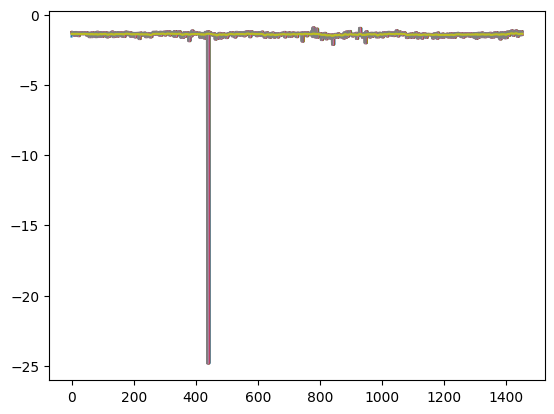

In [73]:
xw=[i for i in range(len(yw))]
yp=model_att_buin_2_shuffle.predict(yw)
plt.plot(xw,yw,xw,yp)

In [74]:
attention_output,attention_scores=model_att_buin_2.layers[4]([yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1)],
                return_attention_scores=True)

<Axes: >

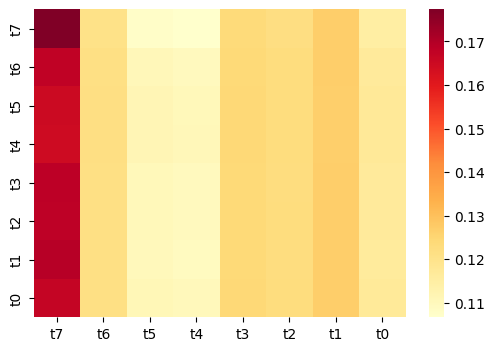

In [75]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [76]:
attention_output.shape

TensorShape([1, 8, 1])

In [77]:
attention_scores.shape

TensorShape([1, 8, 8])

In [78]:
yw.shape

(1453, 8)

In [79]:
W=model_att_buin_2.layers[5].get_weights()
for i in range(len(W)):
    print(i,"=",W[i].shape)

0 = (128, 128)
1 = (128,)
